# Python

### Set-up Enviornment
*This portion of the notebook will run in both Jupyter Notebooks and Google Colab*

In [69]:
# Import the required packages depending on environment
import sys, sqlite3
import pandas as pd
import altair as alt
from vega_datasets import data 
if ('google.colab' in sys.modules)==False:
    alt.renderers.enable('notebook')
    path = input('Path to SQLite file: ')
    sqlcon = sqlite3.connect(path)
    data = pd.read_sql(""" SELECT * FROM Indicators WHERE Year=2015
                        AND IndicatorName='Proportion of seats held by women in national parliaments (%)'
                        AND CountryName in ('Mexico', 'Canada', 'United States','France','Germany','China',
                        'Russia','Spain','Japan','India','Pakistan','South Africa','Nigeria','Oman')""", con=sqlcon)
else:
    data = 'content/database.sqlite'

Path to SQLite file: C:\\Users\\GTayl\\Desktop\\Georgetown\\data\\database.sqlite


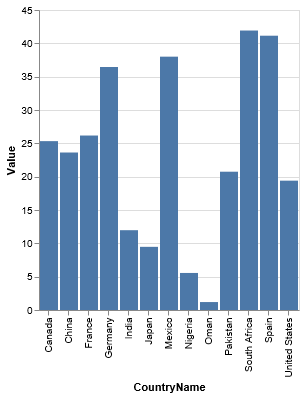

In [70]:
alt.Chart(data).mark_bar().encode(
    x='CountryName',
    y='Value'
)

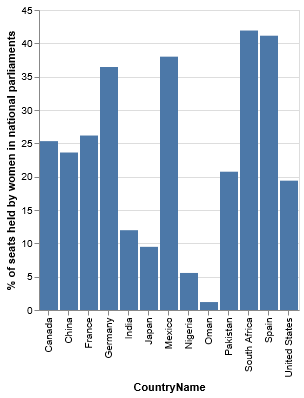

In [72]:
alt.Chart(data).mark_bar().encode(
    x='CountryName',
    y=alt.Y('Value', axis=alt.Axis(title='% of seats held by women in national parliaments'))
)

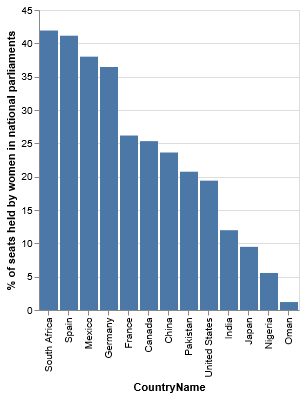

In [73]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('CountryName', sort=alt.EncodingSortField(
            field="Value",  # The field to use for the sort
            order="descending"  # The order to sort in
    )),
    y=alt.Y('Value', axis=alt.Axis(title='% of seats held by women in national parliaments'),
           )
)

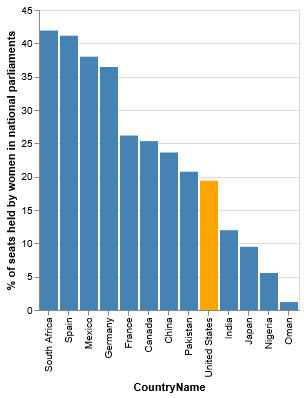

In [76]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('CountryName', sort=alt.EncodingSortField(
            field="Value",  # The field to use for the sort
            order="descending"  # The order to sort in
            )
        ),
    y=alt.Y('Value', axis=alt.Axis(title='% of seats held by women in national parliaments'),
        ),
    color=alt.condition(
        alt.datum.CountryName == 'United States',  # If country is equal to United States,
        alt.value('orange'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
)


# R 
### *This portion will not run in Google Colab (yet)*

In [18]:
# Import the required packages
library("DBI")
library("RSQLite")
library("ggplot2")
library('dplyr')

# Connect to the SQLite Database
path = readline(prompt="Enter path to SQLite database: ")
con = dbConnect(RSQLite::SQLite(), dbname=path)

# Make a request to the file (all the countries in the country table) and store all the results in a dataframe
df = dbGetQuery( con," SELECT * FROM Indicators WHERE Year=2015
                        AND IndicatorName='Proportion of seats held by women in national parliaments (%)'
                        AND CountryName in ('Mexico', 'Canada', 'United States','France','Germany','China',
                        'Russia','Spain','Japan','India','Pakistan','South Africa','Nigeria','Oman')")



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Enter path to SQLite database: C:\\Users\\GTayl\\Desktop\\Georgetown\\data\\database.sqlite


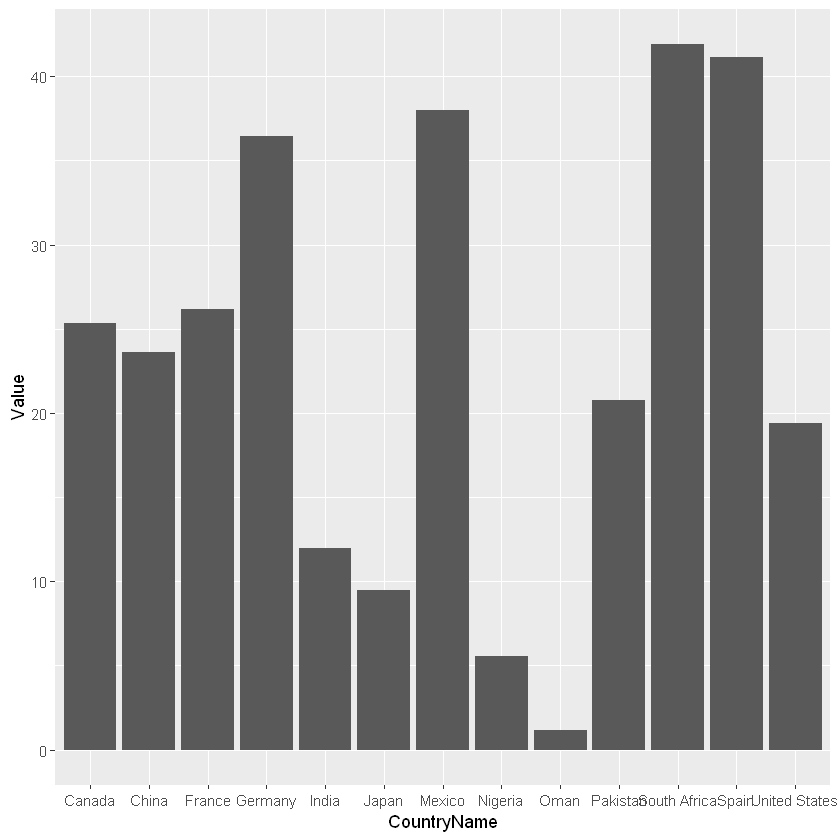

In [19]:
ggplot(data=df, aes(x=CountryName,y=Value))+geom_bar(stat='identity')

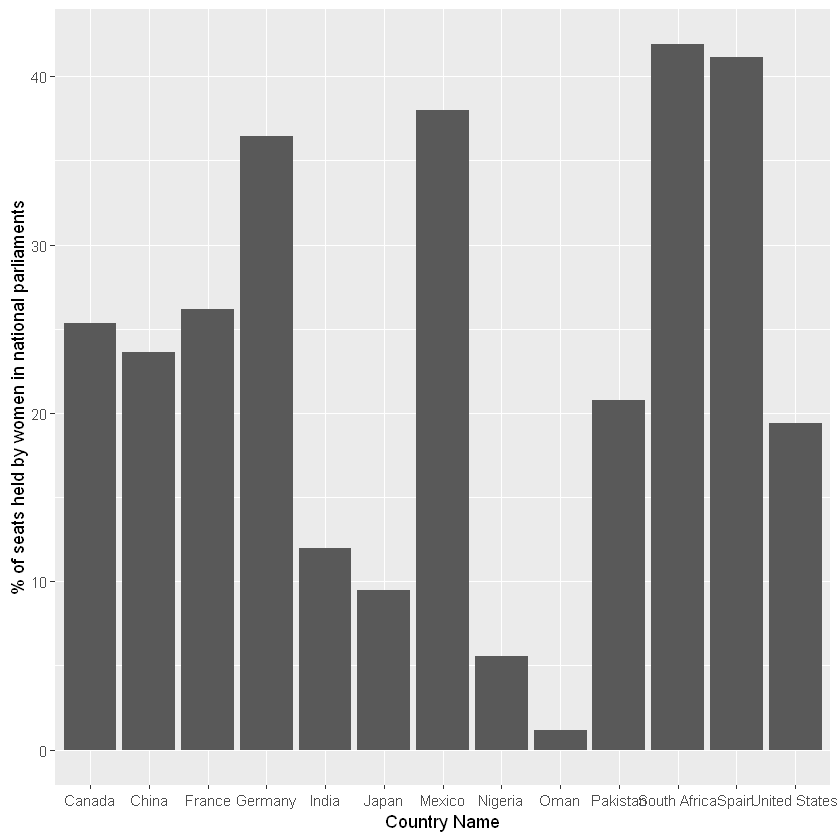

In [20]:
ggplot(data=df, aes(x=CountryName,y=Value))+
    geom_bar(stat='identity')+
    xlab('Country Name')+
    ylab('% of seats held by women in national parliaments')

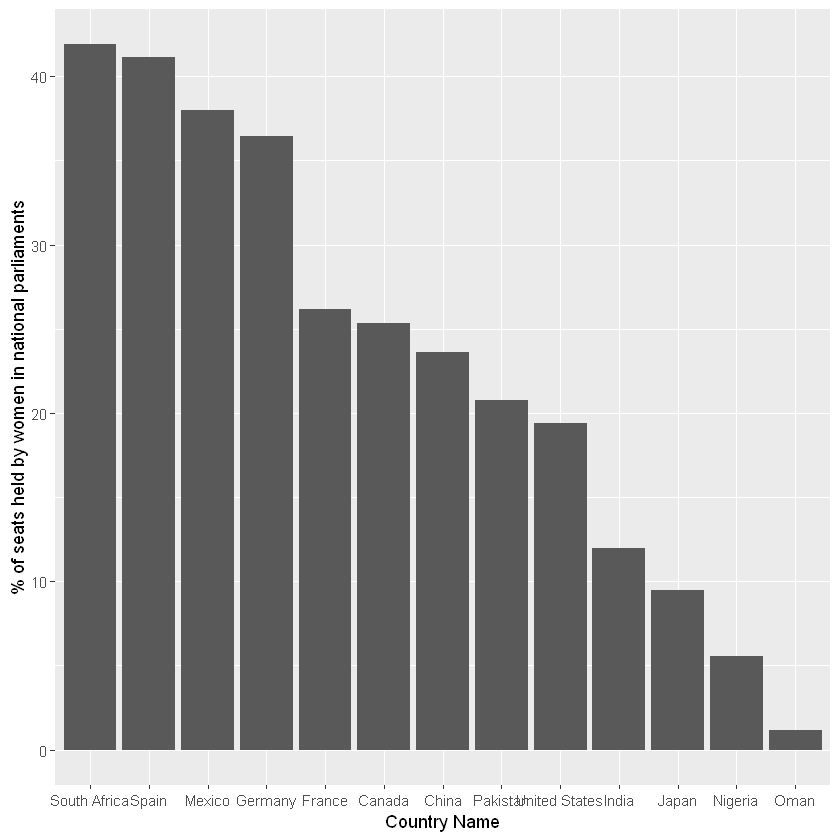

In [21]:

ggplot(data=df, aes(x=reorder(CountryName,-Value),y=Value))+
    geom_bar(stat='identity')+
    xlab('Country Name')+
    ylab('% of seats held by women in national parliaments')

In [25]:
df <- df %>% mutate(ToHighlight = ifelse( CountryName == 'United States', "yes", "no" ) )

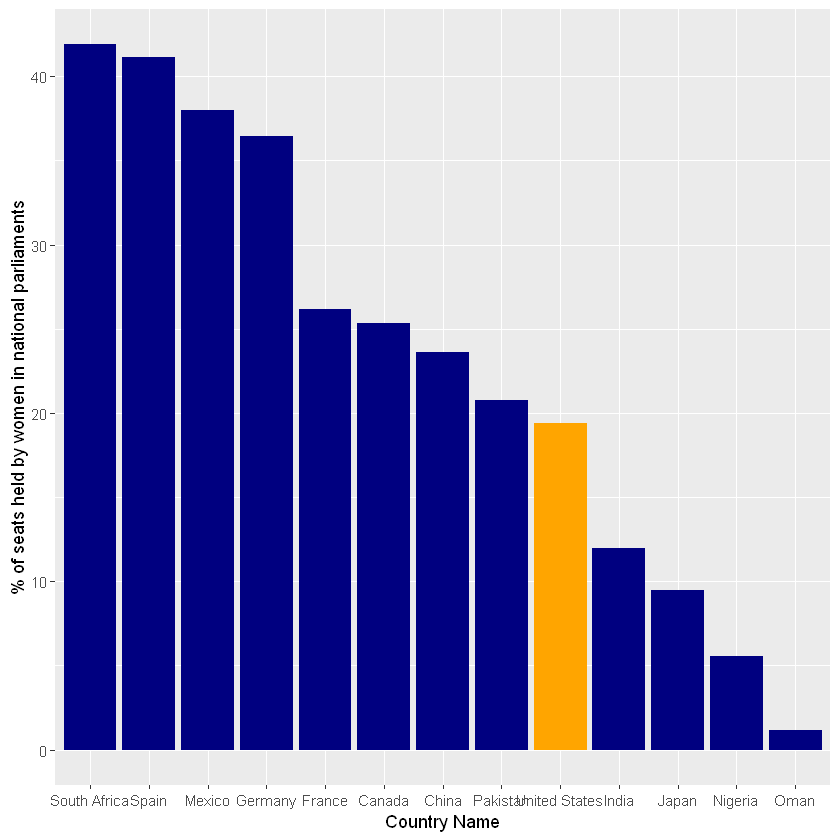

In [33]:
ggplot(data=df, aes(x=reorder(CountryName,-Value),y=Value, fill=ToHighlight))+
    geom_bar(stat='identity')+
    xlab('Country Name')+
    ylab('% of seats held by women in national parliaments')+
    scale_fill_manual( values = c( "yes"="orange", "no"="navy" ), guide = FALSE )